Mental Health Classification Project

In [36]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
#from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier


label_map = {
    "Normal": 0,
    "Depression": 1,
    "Suicidal": 2,
    "Anxiety": 3,
    "Stress": 4,
    "Bipolar": 5,
    "Personality Disorder": 6
}


db = pd.read_csv('Sentiment_analysis_dataset(in).csv')


In [37]:
print("Unique labels in dataset:", db['Status'].unique())


Unique labels in dataset: ['Depression' 'Stress' 'Normal' 'Suicidal' 'Anxiety'
 'Personality disorder' 'Bipolar' nan]


In [38]:
db = db.dropna(subset=['Statement', 'Status'])
db['Status'] = db['Status'].str.strip().str.title()
db['Statement'] = db['Statement'].apply(lambda x: x.lower())
unmapped = set(db['Status'].unique()) - set(label_map.keys())
if unmapped:
    print("Warning: These labels aren't in your map:", unmapped)
    db = db[db['Status'].isin(label_map.keys())]

statement = db['Statement'].tolist()
status = db['Status'].tolist()

print(db.head(20))

                                            Statement      Status
0   life doesn’t feel worth it that’s kind of it? ...  Depression
1   this life sucks and if it were for my religiou...  Depression
2   its been 9 months now for our marriage and she...      Stress
3   i do not feel particularly sad or anxious or a...  Depression
4   i am taking venlafaxine. it is an ssri. does n...  Depression
5   i (17m) have come to the realisation that my d...  Depression
6   been on fluoxetine for year but anyway there s...  Depression
7   even a four day week seems too long i want to ...      Normal
8   i often had suicidal thoughts, recently, with ...    Suicidal
9   this is the first time facing pisces. extro pa...      Normal
10  being an orphan at your early stages of life b...  Depression
11  the dread of thinking you have cancer... again...     Anxiety
12  i (30f) married my husband (31m) about 6 month...      Stress
13           what day is eid al-fitr if you may know?      Normal
14  free c

In [39]:
train_texts, val_texts, train_labels, val_labels = train_test_split(db['Statement'], db['Status'], test_size=0.2, random_state=42)

train_labels = train_labels.reset_index(drop=True)
val_labels = val_labels.reset_index(drop=True)

print(f"training data size: {len(train_texts)}")
print(f"Testing data size: {len(val_texts)}")

training data size: 29500
Testing data size: 7375


In [40]:
#Encode labels
le = LabelEncoder()
train_labels_enc = le.fit_transform(train_labels)
val_labels_enc = le.transform(val_labels)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_texts)
X_val = vectorizer.transform(val_texts)

print(type(train_texts))
print(type(train_texts[0]))


<class 'pandas.core.series.Series'>
<class 'str'>


In [41]:
# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, train_labels_enc)

# Predict and evaluate
val_preds = model.predict(X_val)
print("Logistic Accuracy:", accuracy_score(val_labels_enc, val_preds))
print("\\nClassification Report:\\n", classification_report(val_labels_enc, val_preds, target_names=le.classes_))



Logistic Accuracy: 0.7566101694915254
\nClassification Report:\n                       precision    recall  f1-score   support

             Anxiety       0.80      0.74      0.77       545
             Bipolar       0.88      0.62      0.72       421
          Depression       0.68      0.72      0.70      2140
              Normal       0.84      0.95      0.89      2315
Personality Disorder       0.88      0.38      0.53       172
              Stress       0.64      0.44      0.52       353
            Suicidal       0.69      0.67      0.68      1429

            accuracy                           0.76      7375
           macro avg       0.77      0.65      0.69      7375
        weighted avg       0.76      0.76      0.75      7375



In [ ]:
# class MentalHealthDataset(torch.utils.data.Dataset):
#     def __init__(self, encodings, labels, label_map):
#         self.encodings = encodings
#         self.labels = labels
#         self.label_map = label_map

#     def __getitem__(self, idx):
#         item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
#         label = self.labels.iloc[idx]
#         #item["labels"] = torch.tensor(self.label_map[idx])
#         item["labels"] = torch.tensor(self.label_map[label])
#         return item

#     def __len__(self):
#         return len(self.labels)

# train_dataset = MentalHealthDataset(train_encodings, train_labels, label_map)
# val_dataset = MentalHealthDataset(val_encodings, val_labels, label_map)

In [ ]:
# model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels = 7)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# training_args = TrainingArguments(
#     output_dir="./results",
#     per_device_train_batch_size=8,
#     per_device_eval_batch_size=8,
#     num_train_epochs=3,
#     eval_strategy="epoch",
# )

# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_dataset,
#     eval_dataset=val_dataset,
# )

# trainer.train()

ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.26.0`: Please run `pip install transformers[torch]` or `pip install 'accelerate>=0.26.0'`

In [ ]:
# training_args = TrainingArguments(
#     output_dir="./results",
#     per_device_train_batch_size=8,
#     per_device_eval_batch_size=8,
#     num_train_epochs=3,
#     eval_strategy="epoch",
#     save_strategy="epoch",
#     logging_dir='./logs',
# )

# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_dataset,
#     eval_dataset=val_dataset,
# )


In [ ]:
# model_path = "./model"
# trainer.save_model(model_path)
# tokenizer.save_pretrained(model_path)
# trainer.save_state()



In [ ]:
# from sklearn.metrics import accuracy_score, f1_score

# def compute_metrics(pred):
#     preds = pred.predictions.argmax(-1)
#     labels = pred.label_ids
#     return {
#         "accuracy": accuracy_score(labels, preds),
#         "f1": f1_score(labels, preds, average='weighted')
#     }

In [ ]:
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_dataset,
#     eval_dataset=val_dataset,
#     compute_metrics=compute_metrics
# )


In [ ]:
# import torch

# def predict_label(text, model, tokenizer, label_map):
#     inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
#     outputs = model(**inputs)
#     probs = torch.nn.functional.softmax(outputs.logits, dim=1)
    
#     predicted_label_id = torch.argmax(probs, dim=1).item()
#     label_name = list(label_map.keys())[list(label_map.values()).index(predicted_label_id)]
    
#     return label_name, probs.detach().numpy()


In [43]:
test_statements = [
    "I am so stressed out and tired. I'm so done",
    "Life is so empty and hopeless",
    "I'm fine. Nice weather today!",
    "I have so much homework I'm gonna fail my class.",
    "My dog died. Life has become dull and I'm really sad.",
    "I'm always mad or sad what the hell.",
    "sometimes i hear voices and they confuse me",
    "I'm depressed",
    "I'm anxious"
]

def predict_label(text, model, vectorizer, label_encoder):
    X = vectorizer.transform([text])
    predicted_label_id = model.predict(X)[0]
    label_name = label_encoder.inverse_transform([predicted_label_id])[0]
    return label_name

for text in test_statements:
    label = predict_label(text, model, vectorizer, le)
    print(f"Input: {text}")
    print(f"Predicted Label: {label}")
    print("---")


Input: I am so stressed out and tired. I'm so done
Predicted Label: Stress
---
Input: Life is so empty and hopeless
Predicted Label: Depression
---
Input: I'm fine. Nice weather today!
Predicted Label: Normal
---
Input: I have so much homework I'm gonna fail my class.
Predicted Label: Normal
---
Input: My dog died. Life has become dull and I'm really sad.
Predicted Label: Normal
---
Input: I'm always mad or sad what the hell.
Predicted Label: Normal
---
Input: sometimes i hear voices and they confuse me
Predicted Label: Normal
---
Input: I'm depressed
Predicted Label: Depression
---
Input: I'm anxious
Predicted Label: Anxiety
---


In [ ]:
#trainer.evaluate()

{'eval_loss': 1.947523832321167,
 'eval_model_preparation_time': 0.0038,
 'eval_accuracy': 0.09084745762711864,
 'eval_f1': 0.05975041524765646,
 'eval_runtime': 1435.9369,
 'eval_samples_per_second': 5.136,
 'eval_steps_per_second': 0.642}

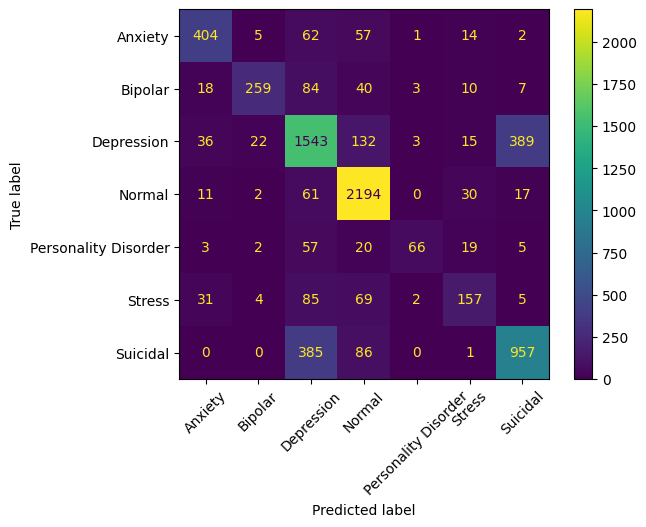

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Predict using logistic regression
y_pred = model.predict(X_val)  # val_preds
y_true = val_labels_enc        # Ground truth from earlier encoding

# Compute and display confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(xticks_rotation=45)
plt.show()